# Import important modules and cleaner & plotter mosules 

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join('../scripts')))

from clean_tellco_dataframe import Tellco
from plot_dataframe import Plotter



# Read CSV Data

In [2]:
tellco_df = pd.read_csv("../data/Week1_challenge_data_source(CSV).csv", na_values=['undefined'])

In [3]:
#initialize the imported modules
plot = Plotter()
cleaner = Tellco()

In [4]:
tellco_df.shape

(150001, 55)

In [5]:
# Bring field discription data
tellco_field_description_df = pd.read_excel("../data/Field Descriptions.xlsx")
tellco_field_description_df.shape

(56, 2)

# Pre Processing Stage

In [6]:
#setup to compare the column names
column_df = pd.DataFrame({"Data Source": pd.Series(tellco_df.columns.tolist()), "Field Description": pd.Series(tellco_field_description_df['Fields'])}) #[pd.Series(tellco_df.columns.tolist()),pd.Series(tellco_field_desc_df['Fields'])])
column_df


,Data Source,Field Description
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


In [7]:
# rename the columns to their appropriate name. because Dur (ms) only exist once we will neglect the other on the field discription 
tellco_df = tellco_df.rename(columns={'Dur. (ms)': 'Dur (s)' , 'Dur. (ms).1': 'Dur (ms)'})
tellco_df.columns.to_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Med

# Clean Missing Data

In [8]:
#view all missing value percentage
missing_value_df = cleaner.get_missing_values(tellco_df)
missing_value_df

,column_name,percent_missing
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000


In [9]:
# columns abouve 30% of missing percentage are advised to be removed
columns_to_be_removed = missing_value_df[missing_value_df['percent_missing'] >= 30.00].index.tolist()
columns_to_be_removed

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'TCP DL Retrans. Vol (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [10]:
# remove the above columns except TCP volumes because they are required for the latter tasks
tellco_clean_df = tellco_df.drop(['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL'], axis=1)

In [11]:
tellco_clean_df.shape

(150001, 47)

In [12]:
#leftover column of column_to_be_removed
tellco_clean_df['TCP DL Retrans. Vol (Bytes)']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: TCP DL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [13]:
#leftover column of column_to_be_removed
tellco_clean_df['TCP UL Retrans. Vol (Bytes)']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: TCP UL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [14]:
#Checking skwness of high percentage columns for filling purposes
print("skewness of some columns")
print(f" Avg RTT UL (ms):  {tellco_clean_df['Avg RTT UL (ms)'].skew(skipna=True)}")
print(f" Avg RTT DL (ms):  {tellco_clean_df['Avg RTT DL (ms)'].skew(skipna=True)}")
print(f" TCP DL Retrans. Vol (Bytes):  {tellco_clean_df['TCP DL Retrans. Vol (Bytes)'].skew(skipna=True)}")
print(f" TCP UL Retrans. Vol (Bytes):  {tellco_clean_df['TCP UL Retrans. Vol (Bytes)'].skew(skipna=True)}")

skewness of some columns
 Avg RTT UL (ms):  28.45741458546382
 Avg RTT DL (ms):  62.90782807995961
 TCP DL Retrans. Vol (Bytes):  15.951808879964869
 TCP UL Retrans. Vol (Bytes):  84.1133930476764


In [15]:
#The right way would be fill the missing data with median but as instructed we will Fill data with the mean. (reason because the above skewness levels are considerd to be high so we can not use mode but advised to use median)
tellco_clean_df['Avg RTT UL (ms)'] =tellco_clean_df['Avg RTT UL (ms)'].fillna(tellco_clean_df['Avg RTT UL (ms)'].mean())
tellco_clean_df['Avg RTT DL (ms)'] =tellco_clean_df['Avg RTT DL (ms)'].fillna(tellco_clean_df['Avg RTT DL (ms)'].mean())
tellco_clean_df['TCP DL Retrans. Vol (Bytes)'] =tellco_clean_df['TCP DL Retrans. Vol (Bytes)'].fillna(tellco_clean_df['TCP DL Retrans. Vol (Bytes)'].mean())
tellco_clean_df['TCP UL Retrans. Vol (Bytes)'] =tellco_clean_df['TCP UL Retrans. Vol (Bytes)'].fillna(tellco_clean_df['TCP UL Retrans. Vol (Bytes)'].mean())
tellco_clean_df['Avg RTT UL (ms)']

0          5.000000
1          5.000000
2         17.662883
3         17.662883
4         17.662883
            ...    
149996     0.000000
149997     2.000000
149998     6.000000
149999     5.000000
150000    17.662883
Name: Avg RTT UL (ms), Length: 150001, dtype: float64

In [16]:
missing_value_df = cleaner.get_missing_values(tellco_clean_df)
missing_value_df

,column_name,percent_missing
Email UL (Bytes),Email UL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000
TCP UL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),0.000000
TCP DL Retrans. Vol (Bytes),TCP DL Retrans. Vol (Bytes),0.000000
Avg RTT UL (ms),Avg RTT UL (ms),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Avg RTT DL (ms),Avg RTT DL (ms),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000


In [17]:
#show all nan valued rows
percentage = cleaner.get_row_nan_percentage(tellco_clean_df)
print(f'percentage of Nan valued rows is: {percentage} %')

percentage of Nan valued rows is: 7.9532803114645905 %


In [18]:
#drop all with nan value
tellco_clean_df.dropna(inplace=True)
tellco_clean_df.shape

(138071, 47)

In [19]:
tellco_clean_df.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur (s)                           float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

# Convert To Appropriate data types

In [20]:
tellco_clean_df['Start'] = pd.to_datetime(tellco_clean_df['Start'], errors='coerce')
tellco_clean_df['End'] = pd.to_datetime(tellco_clean_df['End'], errors='coerce')

In [21]:
tellco_clean_df

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
6,1.311448e+19,2019-04-13 08:41:00,612.0,2019-04-25 08:16:00,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,1.311448e+19,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,113545.0,2.082003e+14,3.364566e+10,3.515541e+13,T88383B,...,23043782.0,19176074.0,18762809.0,9591310.0,810666072.0,14858904.0,777865837.0,14693970.0,59377936.0,862796008.0
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [22]:
#change those columns to integer because they can not be floats
tellco_clean_df = cleaner.convert_to_integer(tellco_clean_df,'Bearer Id')
tellco_clean_df = cleaner.convert_to_integer(tellco_clean_df,'Start ms')
tellco_clean_df = cleaner.convert_to_integer(tellco_clean_df,'End ms')
tellco_clean_df = cleaner.convert_to_integer(tellco_clean_df,'IMSI')
tellco_clean_df = cleaner.convert_to_integer(tellco_clean_df,'MSISDN/Number')
tellco_clean_df = cleaner.convert_to_integer(tellco_clean_df,'IMEI')

In [23]:
# convert to string objects
tellco_clean_df = cleaner.convert_to_string(tellco_clean_df,'Last Location Name')
tellco_clean_df = cleaner.convert_to_string(tellco_clean_df,'Handset Type')
tellco_clean_df = cleaner.convert_to_string(tellco_clean_df,'Handset Manufacturer')

In [24]:
tellco_clean_df.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start ms                                   int64
End                               datetime64[ns]
End ms                                     int64
Dur (s)                                  float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [25]:
# fix handset type and manufacturer missing values
tellco_clean_df = cleaner.fix_missing_value(tellco_clean_df,'Handset Manufacturer','unknown')
tellco_clean_df = cleaner.fix_missing_value(tellco_clean_df,'Handset Type','unknown')

In [26]:
tellco_clean_df.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start ms                                   int64
End                               datetime64[ns]
End ms                                     int64
Dur (s)                                  float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

# Drop Duplicate rows and Unwanted Columns

In [27]:
tellco_clean_df = cleaner.drop_duplicate(tellco_clean_df)

In [28]:
# Drop Dur (s) column because we already have Dur (ms) column and we can get the previous from the latter by just dividing with 1000
tellco_clean_df = cleaner.drop_column(tellco_clean_df, 'Dur (s)')

# Univariate Analysis

In [29]:
# combine upload and download datafor each app and total data to make it easy to make analysis easier
tellco_clean_df['Social Media Data Volume (Bytes)'] = tellco_clean_df['Social Media UL (Bytes)'] + tellco_clean_df['Social Media DL (Bytes)']
tellco_clean_df['Google Data Volume (Bytes)'] = tellco_clean_df['Google UL (Bytes)'] + tellco_clean_df['Google DL (Bytes)']
tellco_clean_df['Email Data Volume (Bytes)'] = tellco_clean_df['Email UL (Bytes)'] + tellco_clean_df['Email DL (Bytes)']
tellco_clean_df['Youtube Data Volume (Bytes)'] = tellco_clean_df['Youtube UL (Bytes)'] + tellco_clean_df['Youtube DL (Bytes)']
tellco_clean_df['Netflix Data Volume (Bytes)'] = tellco_clean_df['Netflix UL (Bytes)'] + tellco_clean_df['Netflix DL (Bytes)']
tellco_clean_df['Gaming Data Volume (Bytes)'] = tellco_clean_df['Gaming UL (Bytes)'] + tellco_clean_df['Gaming DL (Bytes)']
tellco_clean_df['Other Data Volume (Bytes)'] = tellco_clean_df['Other UL (Bytes)'] + tellco_clean_df['Other DL (Bytes)']
tellco_clean_df['Total Data Volume (Bytes)'] = tellco_clean_df['Total UL (Bytes)'] + tellco_clean_df['Total DL (Bytes)']

In [30]:
tellco_clean_df[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.380710e+05
mean,1.827957e+06
std,1.035470e+06
min,1.563000e+03
25%,9.312060e+05
50%,1.826757e+06
75%,2.726343e+06
max,3.650240e+06


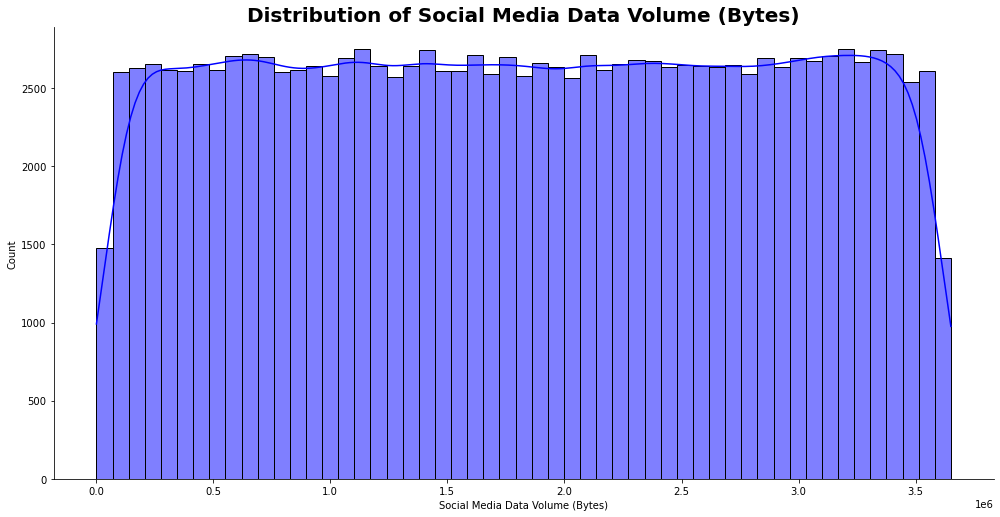

In [31]:
plot.plot_hist(tellco_clean_df, 'Social Media Data Volume (Bytes)', 'blue')

# plot.plot_box_multi(tellco_clean_df, x_col="Social Media Data Volume (Bytes)", y_col="Handset Manufacturer", title="number of medications outilers in race column")

In [32]:
tellco_clean_df[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.380710e+05
mean,7.807930e+06
std,3.517752e+06
min,4.033000e+04
25%,4.940168e+06
50%,7.816637e+06
75%,1.068531e+07
max,1.552878e+07


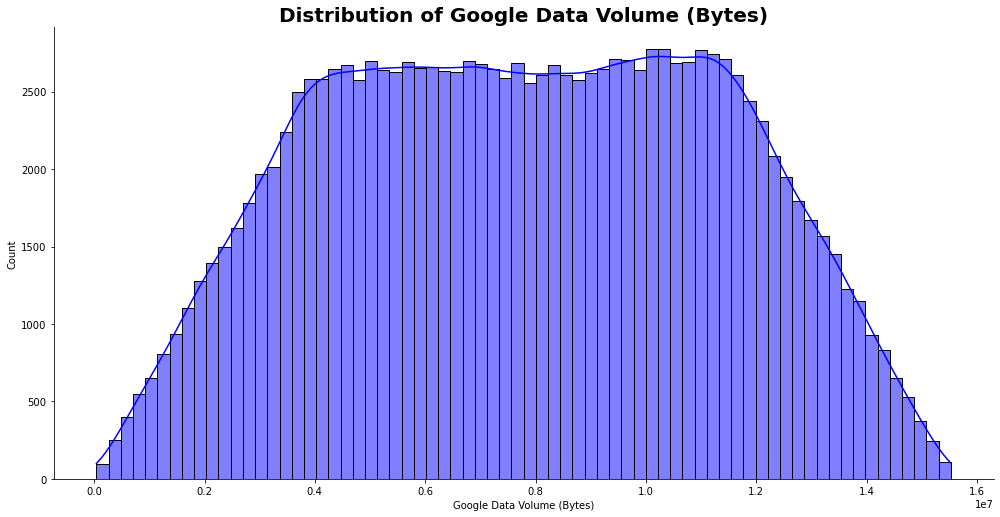

In [33]:
plot.plot_hist(tellco_clean_df, 'Google Data Volume (Bytes)', 'blue')

In [34]:
tellco_clean_df[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.380710e+05
mean,2.258390e+06
std,1.070802e+06
min,8.359000e+03
25%,1.358567e+06
50%,2.262860e+06
75%,3.158602e+06
max,4.518036e+06


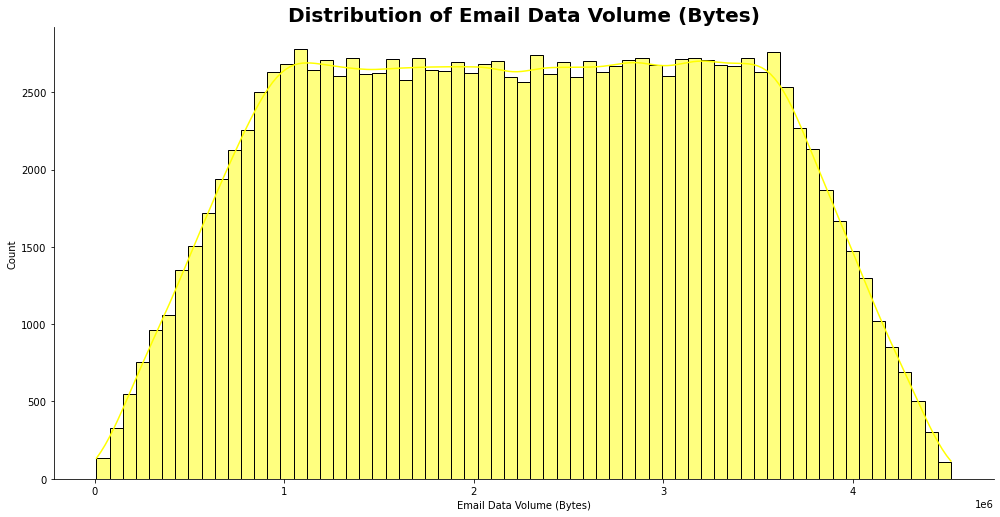

In [35]:
plot.plot_hist(tellco_clean_df, 'Email Data Volume (Bytes)', 'yellow')

In [36]:
tellco_clean_df[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.380710e+05
mean,2.264140e+07
std,9.247286e+06
min,1.296550e+05
25%,1.599099e+07
50%,2.266795e+07
75%,2.929900e+07
max,4.519008e+07


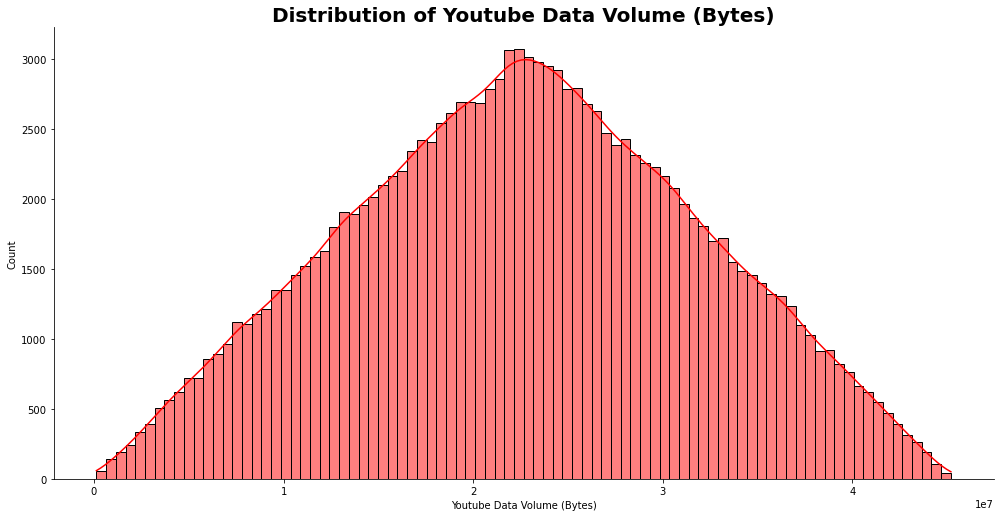

In [37]:
plot.plot_hist(tellco_clean_df, 'Youtube Data Volume (Bytes)', 'red')

In [38]:
tellco_clean_df[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.380710e+05
mean,2.262875e+07
std,9.252857e+06
min,9.843200e+04
25%,1.598462e+07
50%,2.263554e+07
75%,2.927244e+07
max,4.519815e+07


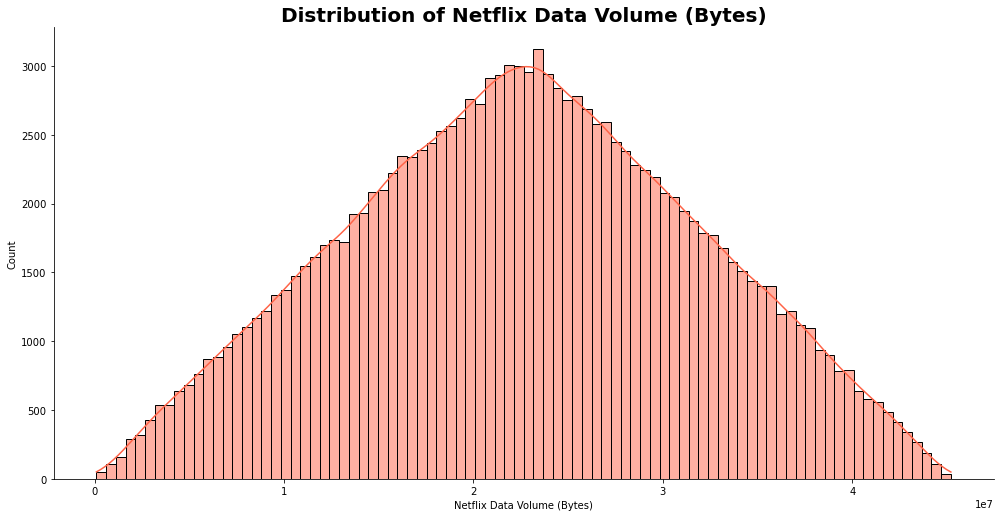

In [39]:
plot.plot_hist(tellco_clean_df, 'Netflix Data Volume (Bytes)', 'tomato')

In [40]:
tellco_clean_df[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.380710e+05
mean,4.300400e+08
std,2.441311e+08
min,3.063580e+05
25%,2.183016e+08
50%,4.311000e+08
75%,6.413710e+08
max,8.592028e+08


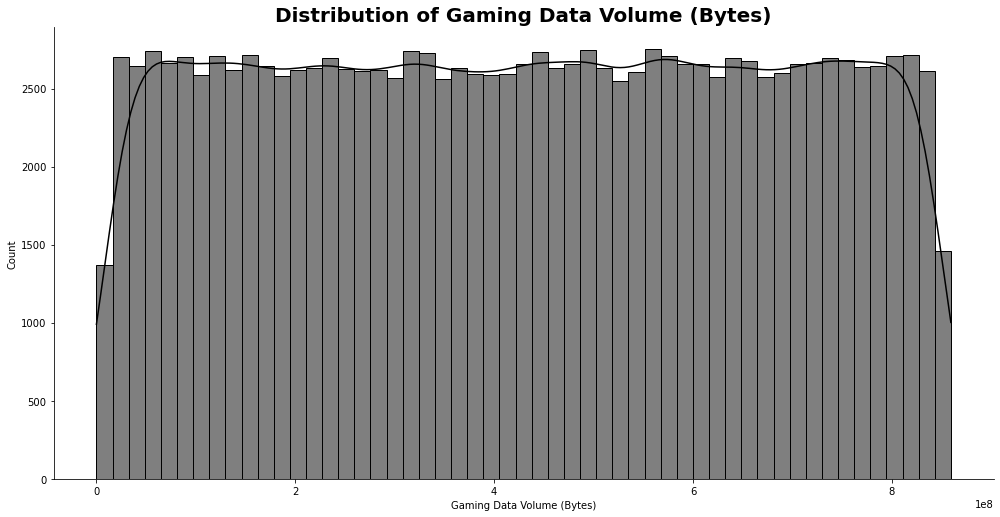

In [41]:
plot.plot_hist(tellco_clean_df, 'Gaming Data Volume (Bytes)', 'black')

In [42]:
tellco_clean_df[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.380710e+05
mean,4.954683e+08
std,2.444744e+08
min,2.895611e+07
25%,2.841008e+08
50%,4.962974e+08
75%,7.063820e+08
max,9.559848e+08


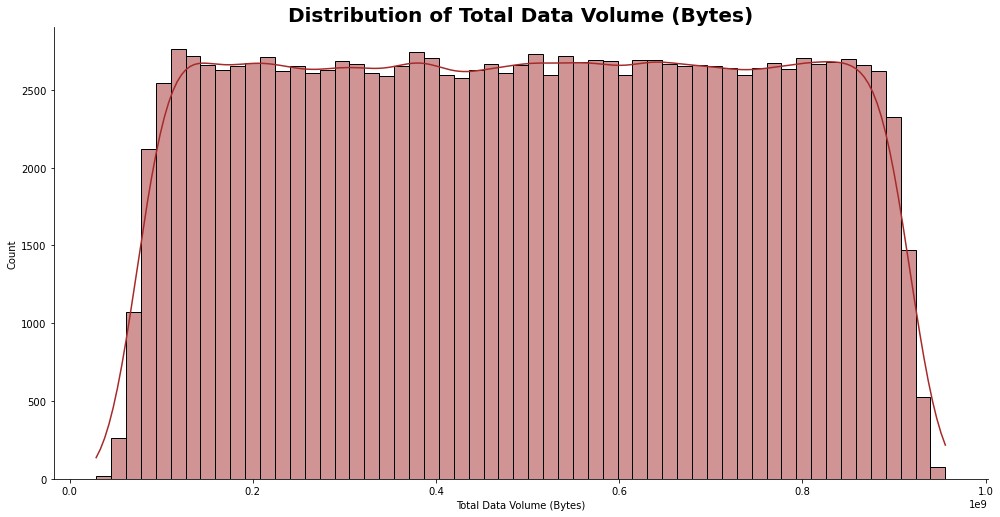

In [43]:
plot.plot_hist(tellco_clean_df, 'Total Data Volume (Bytes)', 'brown')

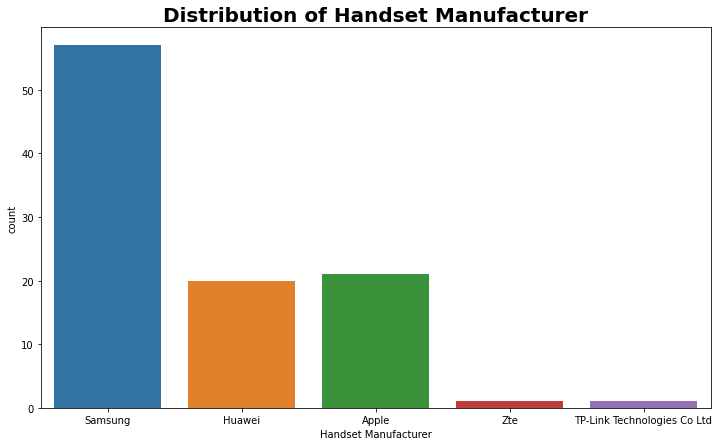

In [44]:
plot.plot_count(tellco_clean_df.head(100), 'Handset Manufacturer')

# Bivariate Analysis

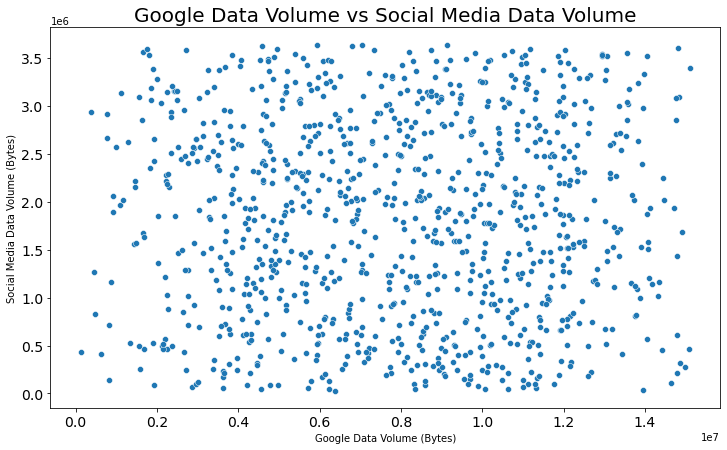

In [45]:
plot.plot_scatter(tellco_clean_df.head(1000), x_col="Google Data Volume (Bytes)", y_col="Social Media Data Volume (Bytes)", title="Google Data Volume vs Social Media Data Volume")

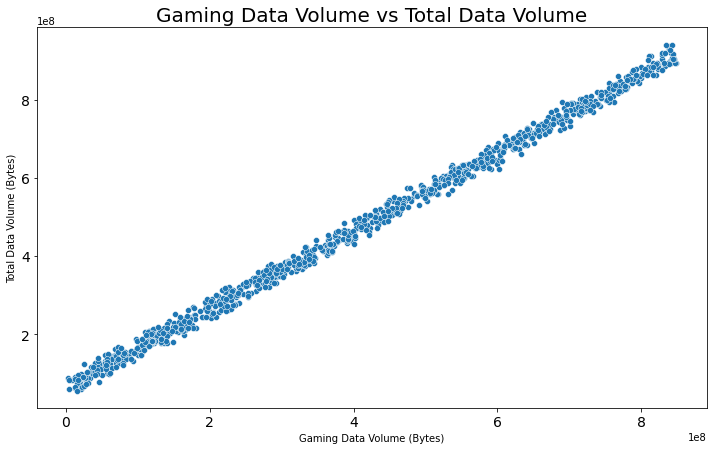

In [46]:
plot.plot_scatter(tellco_clean_df.head(1000), x_col='Gaming Data Volume (Bytes)', y_col='Total Data Volume (Bytes)', title="Gaming Data Volume vs Total Data Volume")

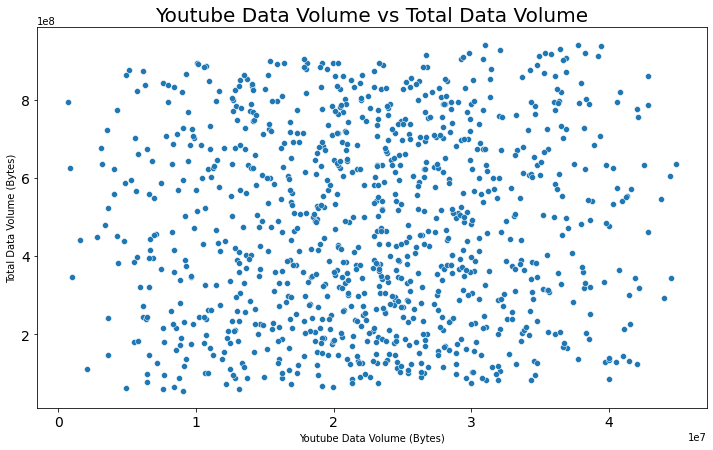

In [47]:
plot.plot_scatter(tellco_clean_df.head(1000), x_col='Youtube Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Youtube Data Volume vs Total Data Volume")

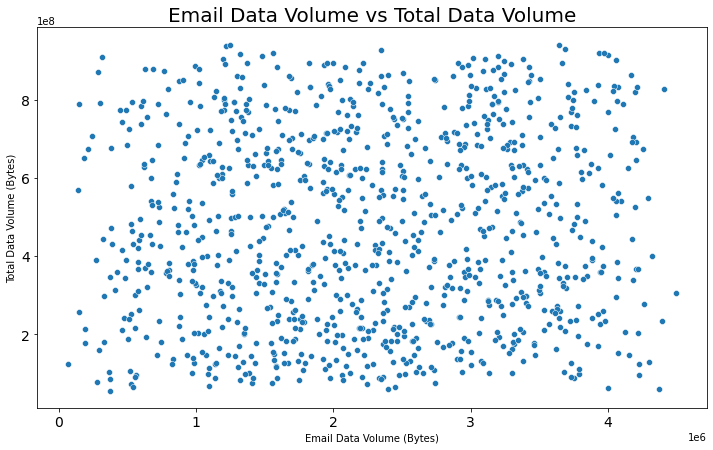

In [48]:
plot.plot_scatter(tellco_clean_df.head(1000), x_col='Email Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Email Data Volume vs Total Data Volume")

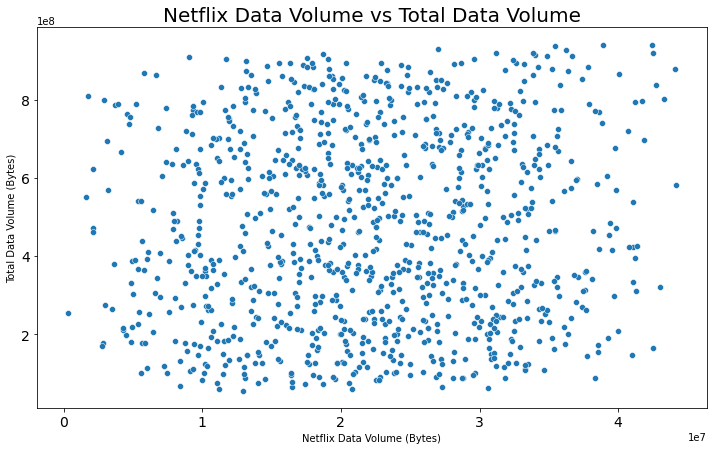

In [49]:
plot.plot_scatter(tellco_clean_df.head(1000), x_col='Netflix Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Netflix Data Volume vs Total Data Volume")

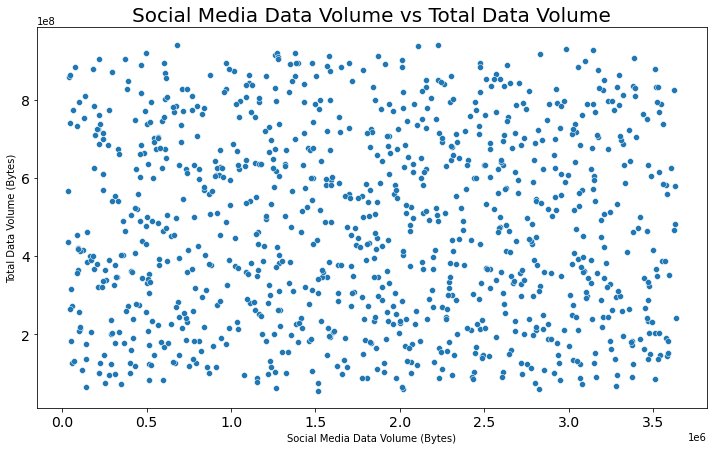

In [50]:
plot.plot_scatter(tellco_clean_df.head(1000), x_col='Social Media Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Social Media Data Volume vs Total Data Volume")

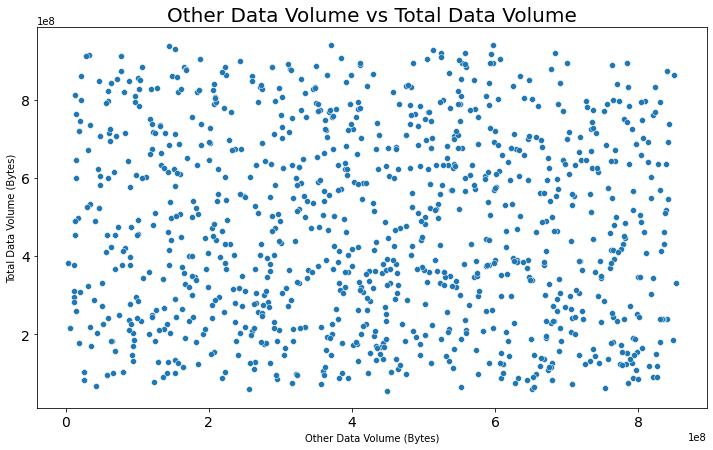

In [51]:
plot.plot_scatter(tellco_clean_df.head(1000), x_col='Other Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Other Data Volume vs Total Data Volume")

# Fix Outliners

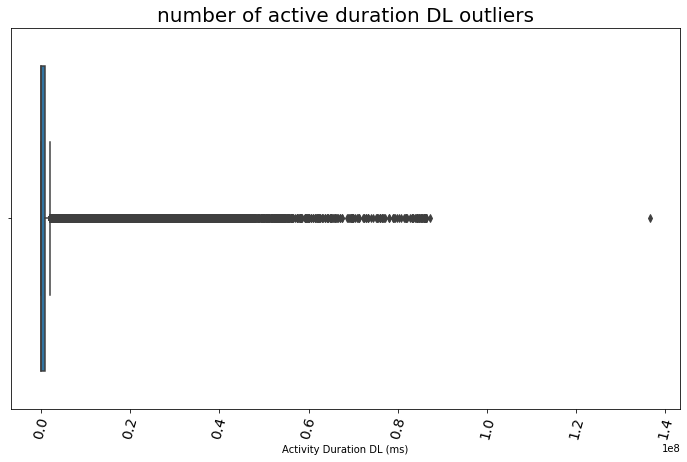

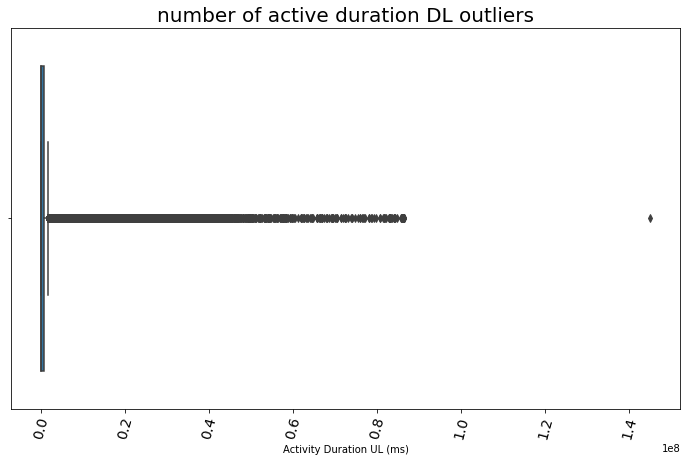

In [52]:
# show two outlined coumns to then show the result
plot.plot_box(tellco_clean_df, 'Activity Duration DL (ms)', "number of active duration DL outliers")
plot.plot_box(tellco_clean_df, 'Activity Duration UL (ms)', "number of active duration DL outliers")

In [53]:
# fix all outliners
tellco_clean_df = cleaner.fix_outliers(tellco_clean_df)

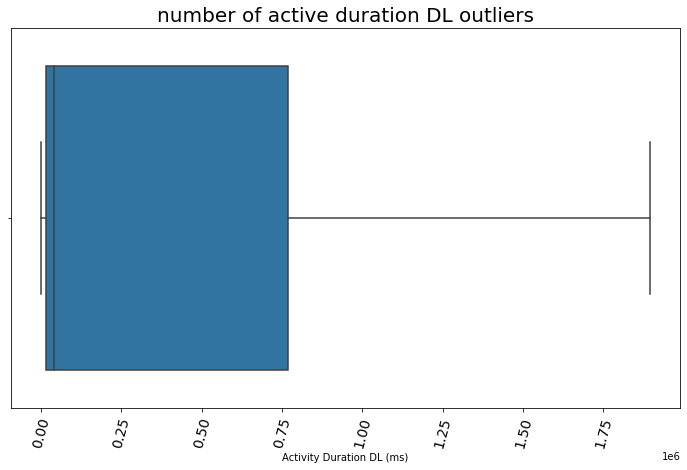

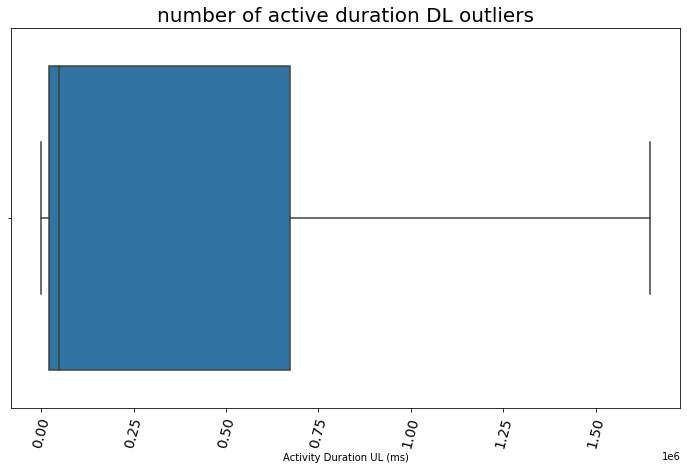

In [54]:
plot.plot_box(tellco_clean_df, 'Activity Duration DL (ms)', "number of active duration DL outliers")
plot.plot_box(tellco_clean_df, 'Activity Duration UL (ms)', "number of active duration DL outliers")

# Correlation Analysis

In [55]:
corelated_df = tellco_clean_df[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)','Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)','Other Data Volume (Bytes)']].corr()
corelated_df

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.002494,0.003063,0.000680,0.000759,0.001112,0.005395
Google Data Volume (Bytes),-0.002494,1.000000,0.000484,0.001871,-0.001316,-0.001173,-0.002304
Email Data Volume (Bytes),0.003063,0.000484,1.000000,-0.005626,0.001441,0.000803,-0.000846
Youtube Data Volume (Bytes),0.000680,0.001871,-0.005626,1.000000,0.003873,-0.003240,0.002797
Netflix Data Volume (Bytes),0.000759,-0.001316,0.001441,0.003873,1.000000,-0.004676,-0.008159
Gaming Data Volume (Bytes),0.001112,-0.001173,0.000803,-0.003240,-0.004676,1.000000,-0.002593
Other Data Volume (Bytes),0.005395,-0.002304,-0.000846,0.002797,-0.008159,-0.002593,1.000000


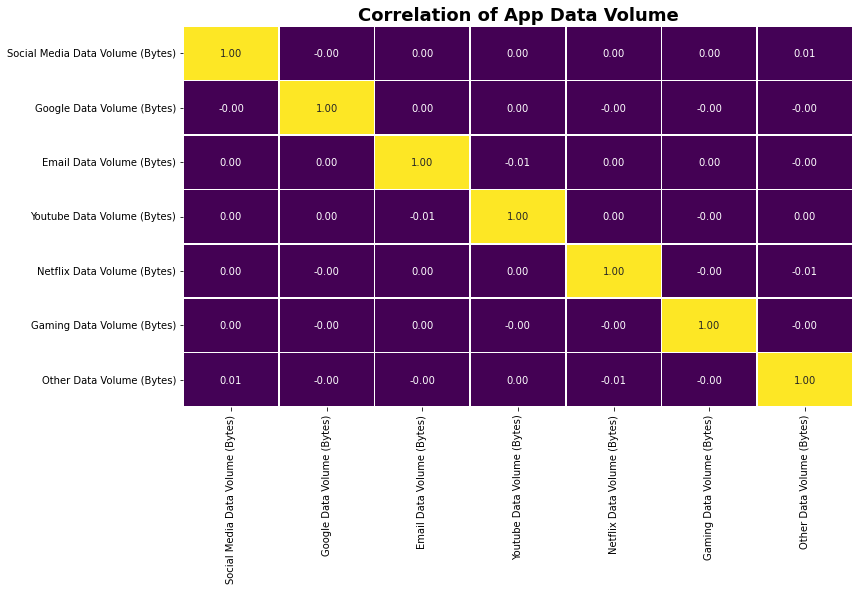

In [56]:
plot.plot_heatmap(corelated_df, "Correlation of App Data Volume")

In [58]:
tellco_clean_df.to_csv('../data/clean_data.csv')